In [7]:
# Messing around with flow hashing to see how it influences throughput

In [1]:
import os
import re
import pandas as pd
import numpy as np

import plotly
import plotly.plotly as py
from plotly.graph_objs import *

plotly.tools.set_credentials_file(username='theano', api_key='hkYRYxjyM0aAGA5nmGq1')

In [2]:
import matplotlib.pyplot as plt

import matplotlib
matplotlib.style.use('ggplot')

In [3]:
home = os.getcwd()
print(home)

/home/theano/mountpoint/tsch/mininetpipe


In [12]:
def load_datfile(fpath, proto):
    # Returns a dataframe
    df = pd.read_csv(fpath, 
                     index_col=False,
                     names=["ncli",proto])
    return df

In [14]:
results_dir = os.path.join(home, "results", "ethtool")

In [52]:
results_files = ["udp_sd_noirqb.txt",
                "udp_sd_irqb.txt",
                "udp_sdfn_noirqb.txt",
                #"tcp_irqb.txt",
                #"tcp_noirqb"
                ]

In [53]:
gps = []

for fname in results_files:
    df = load_datfile(os.path.join(results_dir, fname), fname)
    gps.append(df.groupby("ncli"))

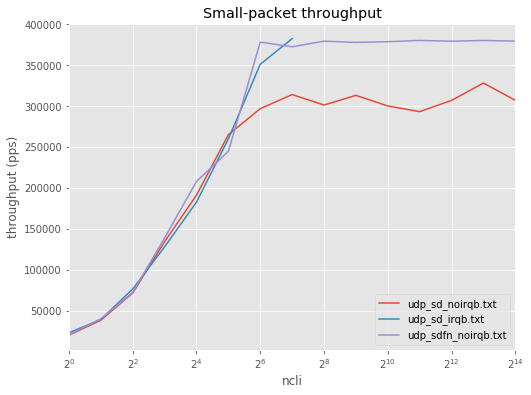

In [54]:
fig, ax = plt.subplots(figsize=(8,6))

ax.title.set_text("Small-packet throughput")

ax.set_xlabel("# clients")
ax.set_ylabel("throughput (pps)")

ax.set_xscale('log', basex=2)
#ax.set_yscale('log', basey=10)

for gp in gps:
    gp.mean().plot(ax=ax)

ax.legend(loc=4)

plt.show()

In [28]:
fig = {
    'data': [
        {
            'x': gp.mean().index,
            'y': gp.mean()[gp.mean().columns[0]],
            'name': gp.mean().columns[0],
        } for gp in gps
    ],
    'layout': {
        'xaxis': {'title': '# clients', 'type': 'log'},
        'yaxis': {'title': 'throughput (pps)', 'type': 'log'},
        'title': 'Small-packet throughput'
    }
}

py.iplot(fig, filename="somefilename")